In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Summary

The below dataset pertains to variables which will be used to predict the consulting fee of a doctor.

### Columnal Information

### Calling DataFrames

In [2]:
#calling training data
ds_doc_train=pd.read_csv("Doctor_Train.csv",encoding="unicode_escape")
ds_doc_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
#calling testing data
ds_doc_test=pd.read_csv("Doctor_Test.csv",encoding="unicode_escape")
ds_doc_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


### Describing Information

In [4]:
#describing train data information
ds_doc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
#describing test data information
ds_doc_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


### Checking Missing Values

In [6]:
#checking train data missing values
ds_doc_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [7]:
#checking test data missing values
ds_doc_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

### Replacing Missing Values

In [8]:
#as all the missing values are from columns which are from columns that are categorical in nature, we will use mode as strategy
#replacing train data missing values
for col in ["Rating","Place","Miscellaneous_Info"]:
    ds_doc_train[col].fillna(ds_doc_train[col].mode()[0],inplace=True)  

In [9]:
#replacing test data missing values
for col in ["Rating","Place","Miscellaneous_Info"]:
    ds_doc_test[col].fillna(ds_doc_test[col].mode()[0],inplace=True)   

### Re-checking Missing Values

In [10]:
#re-checking training dataset null values
ds_doc_train.isnull().sum()       

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [11]:
#re-checking testing dataset null values
ds_doc_test.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

### Feature Engineering

In [12]:
#feature engineering column Qualification on training dataset
ds_doc_train['Qual_1'] = ds_doc_train['Qualification'].str.split(',').str[0]
ds_doc_train['Qual_2'] = ds_doc_train['Qualification'].str.split(',').str[1]
ds_doc_train['Qual_3'] = ds_doc_train['Qualification'].str.split(',').str[2]
ds_doc_train['Qual_1'].fillna("XXX",inplace = True)
ds_doc_train['Qual_2'].fillna("XXX",inplace = True)
ds_doc_train['Qual_3'].fillna("XXX",inplace = True)

In [13]:
#feature engineering column Qualification on testing dataset
ds_doc_test['Qual_1'] = ds_doc_test['Qualification'].str.split(',').str[0]
ds_doc_test['Qual_2'] = ds_doc_test['Qualification'].str.split(',').str[1]
ds_doc_test['Qual_3'] = ds_doc_test['Qualification'].str.split(',').str[2]
ds_doc_test['Qual_1'].fillna("XXX",inplace = True)
ds_doc_test['Qual_2'].fillna("XXX",inplace = True)
ds_doc_test['Qual_3'].fillna("XXX",inplace = True)

In [14]:
#feature engineering column Rating in the training dataset and changing object type to integer
ds_doc_train["Rating"] = ds_doc_train["Rating"].str.slice(stop=-1).astype(int)

In [15]:
#feature engineering column Rating in the testing dataset and changing object type to integer
ds_doc_test["Rating"] = ds_doc_test["Rating"].str.slice(stop=-1).astype(int)

In [16]:
#feature engineering column Place in the training datset
ds_doc_train['City'] = ds_doc_train['Place'].str.split(',').str[1]
ds_doc_train['Locality'] = ds_doc_train['Place'].str.split(',').str[0]
ds_doc_train['City'].fillna("XXX",inplace=True)
ds_doc_train['Locality'].fillna("XXX",inplace=True)

In [17]:
#feature engineering column Place in the testing datset
ds_doc_test['City'] = ds_doc_test['Place'].str.split(',').str[1]
ds_doc_test['Locality'] = ds_doc_test['Place'].str.split(',').str[0]
ds_doc_test['City'].fillna("XXX",inplace=True)
ds_doc_test['Locality'].fillna("XXX",inplace=True)

In [18]:
#feature emgineering Experience column in the training dataset
ds_doc_train["Experience"] = ds_doc_train["Experience"].str.split()
ds_doc_train["Experience"] = ds_doc_train["Experience"].str[0].astype("int")

In [19]:
#feature emgineering Experience column in the testing dataset
ds_doc_test["Experience"] = ds_doc_test["Experience"].str.split()
ds_doc_test["Experience"] = ds_doc_test["Experience"].str[0].astype("int")

In [20]:
#calling training dataframe
ds_doc_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,City,Locality
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,XXX,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,XXX,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,100,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,MBBS,MS - Otorhinolaryngology,XXX,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,100,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,BSc - Zoology,BAMS,XXX,Bangalore,Bannerghatta Road
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,XXX,XXX,Chennai,Keelkattalai
...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,MBBS,MS - ENT,XXX,Bangalore,Basavanagudi
5957,MBBS,33,100,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100,MBBS,XXX,XXX,Chennai,Nungambakkam
5958,MBBS,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,MBBS,XXX,XXX,Delhi,Greater Kailash Part 2
5959,"MBBS, MD - General Medicine",15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,MBBS,MD - General Medicine,XXX,Mumbai,Vileparle West


In [21]:
#calling testing dataframe
ds_doc_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qual_1,Qual_2,Qual_3,City,Locality
0,MBBS,35,100,"Ghatkopar East, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,MBBS,XXX,XXX,Mumbai,Ghatkopar East
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100,"West Marredpally, Hyderabad",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,MBBS,Diploma in Otorhinolaryngology (DLO),XXX,Hyderabad,West Marredpally
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",MBBS,DDVL,XXX,Chennai,KK Nagar
3,BAMS,0,100,"New Ashok Nagar, Delhi",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,BAMS,XXX,XXX,Delhi,New Ashok Nagar
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,BDS,MDS - Conservative Dentistry & Endodontics,XXX,Bangalore,Kanakpura Road
...,...,...,...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,100,"Basavanagudi, Bangalore",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,BAMS,Doctor of Medicine,XXX,Bangalore,Basavanagudi
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,100,"Choolai, Chennai",Dermatologists,Acrylic Partial Denture Crowns and Bridges Fix...,MD - Dermatology,Venereology & Leprosy,MBBS,Chennai,Choolai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,100,"Porur, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,MBBS,MD / MS - Obstetrics & Gynaecology,XXX,Chennai,Porur
1985,BDS,12,98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,BDS,XXX,XXX,Bangalore,Arekere


### Dropping Columns

In [22]:
#we will be droppin the lesser important columns which we will not consider in making the model.
ds_doc_train.drop("Qualification",inplace=True,axis=1)
ds_doc_train.drop("Place",inplace=True,axis=1)
ds_doc_train.drop("Miscellaneous_Info",inplace=True,axis=1)
ds_doc_train.drop("Qual_2",inplace=True,axis=1)
ds_doc_train.drop("Qual_3",inplace=True,axis=1)
ds_doc_train.drop("Locality",inplace=True,axis=1)
ds_doc_test.drop("Qualification",inplace=True,axis=1)
ds_doc_test.drop("Place",inplace=True,axis=1)
ds_doc_test.drop("Miscellaneous_Info",inplace=True,axis=1)
ds_doc_test.drop("Qual_2",inplace=True,axis=1)
ds_doc_test.drop("Qual_3",inplace=True,axis=1)
ds_doc_test.drop("Locality",inplace=True,axis=1)

In [23]:
#calling traning dataframe
ds_doc_train

,Experience,Rating,Profile,Fees,Qual_1,City
0,24,100,Homeopath,100,BHMS,Ernakulam
1,12,98,Ayurveda,350,BAMS,Bangalore
2,9,100,ENT Specialist,300,MBBS,Bangalore
3,12,100,Ayurveda,250,BSc - Zoology,Bangalore
4,20,100,Ayurveda,250,BAMS,Chennai
...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,MBBS,Bangalore
5957,33,100,General Medicine,100,MBBS,Chennai
5958,41,97,General Medicine,600,MBBS,Delhi
5959,15,90,General Medicine,100,MBBS,Mumbai


In [24]:
#calling testing dataframe
ds_doc_test

,Experience,Rating,Profile,Qual_1,City
0,35,100,General Medicine,MBBS,Mumbai
1,31,100,ENT Specialist,MBBS,Hyderabad
2,40,70,Dermatologists,MBBS,Chennai
3,0,100,Ayurveda,BAMS,Delhi
4,16,100,Dentist,BDS,Bangalore
...,...,...,...,...,...
1982,10,100,Ayurveda,BAMS,Bangalore
1983,4,100,Dermatologists,MD - Dermatology,Chennai
1984,9,100,General Medicine,MBBS,Chennai
1985,12,98,Dentist,BDS,Bangalore


### Describing Statistics

In [25]:
ds_doc_train.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,97.610636,307.944640
std,11.142798,5.881539,190.920373
min,0.000000,7.000000,5.000000
25%,9.000000,98.000000,150.000000
50%,14.000000,100.000000,300.000000
75%,23.000000,100.000000,500.000000
max,66.000000,100.000000,950.000000


### Plotting Correlation 

In [26]:
#plotting correlation fro the  
ds_doc_train.corr()

,Experience,Rating,Fees
Experience,1.000000,-0.149594,0.002117
Rating,-0.149594,1.000000,-0.154713
Fees,0.002117,-0.154713,1.000000


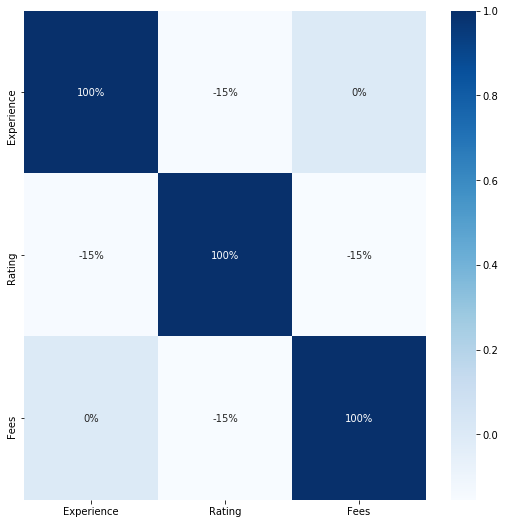

In [27]:
#plotting correlation in a heatmap
corr_hmap=ds_doc_train.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr_hmap,annot=True,fmt=".0%",cmap="Blues")
plt.show()

Text(0.5, 1.0, 'Correlation wih target variable')

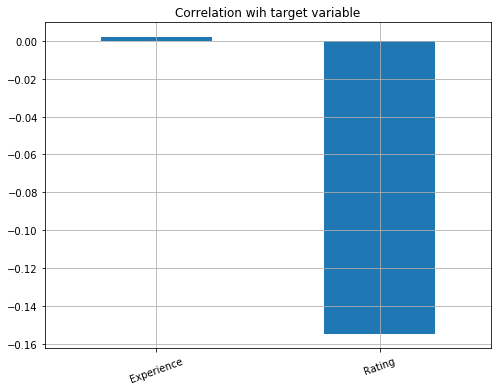

In [28]:
#plotting a corelation graph
plt.figure(figsize=(8,6))
ds_doc_train.drop("Fees",axis=1).corrwith(ds_doc_train["Fees"]).plot(kind="bar",grid=True)
plt.xticks(rotation=20)
plt.title("Correlation wih target variable")

### Univariate Analysis

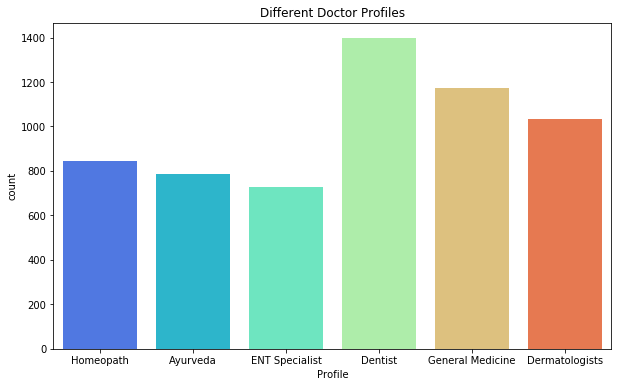

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [29]:
#plotting doctors profile in a countplot
plt.figure(figsize=(10,6))
sns.countplot(x="Profile",data=ds_doc_train,palette="rainbow")
plt.title("Different Doctor Profiles")
plt.show()
print(ds_doc_train["Profile"].value_counts())

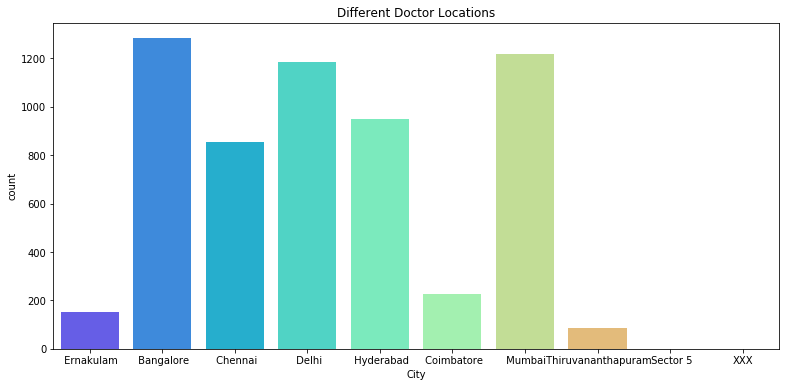

 Bangalore             1283
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
XXX                       1
 Sector 5                 1
Name: City, dtype: int64


In [30]:
#plotting doctors location in a countplot
plt.figure(figsize=(13,6))
sns.countplot(x="City",data=ds_doc_train,palette="rainbow")
plt.title("Different Doctor Locations")
plt.show()
print(ds_doc_train["City"].value_counts())

### Bivariate Analysis

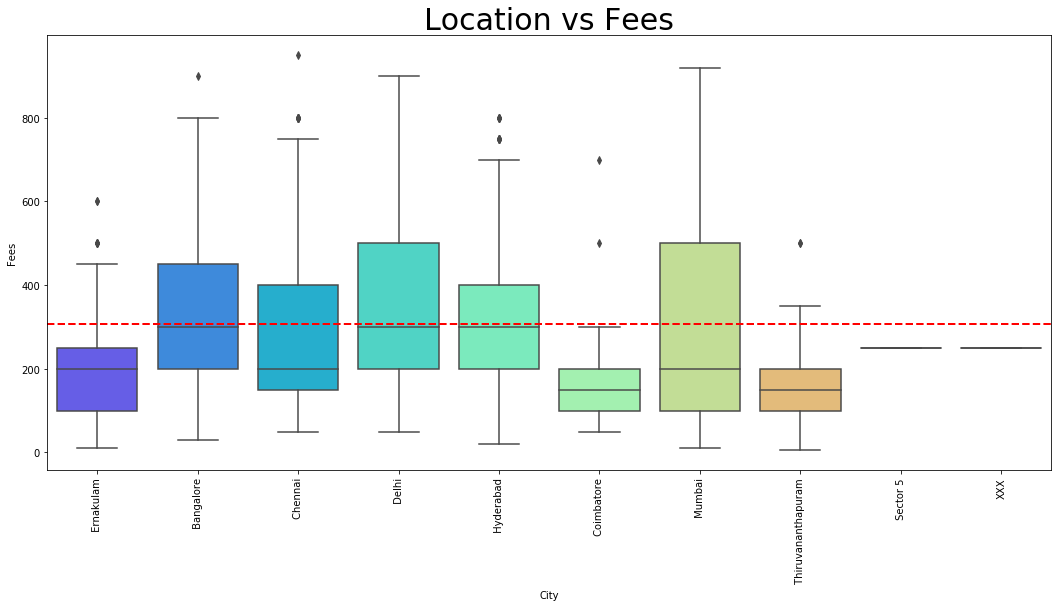

In [31]:
#plotting location vs price in a box plot
plt.figure(figsize=(18,8))
mean_price=np.mean(ds_doc_train["Fees"])
sns.boxplot(y="Fees",x="City",data=ds_doc_train,palette="rainbow")
plt.axhline(mean_price,color="r",linestyle="dashed",linewidth=2)
plt.title("Location vs Fees",fontsize=30)
plt.xticks(rotation="vertical")
plt.show()

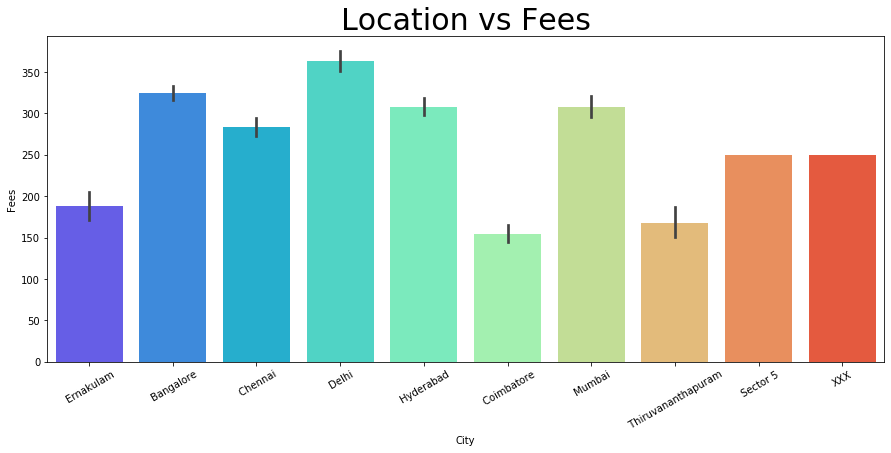

In [32]:
#plotting location vs price in a bar plot
plt.figure(figsize=(15,6))
sns.barplot(y="Fees",x="City",data=ds_doc_train,palette="rainbow")
plt.title("Location vs Fees",fontsize=30)
plt.xticks(rotation=30)
plt.show()

### Plotting Outliers

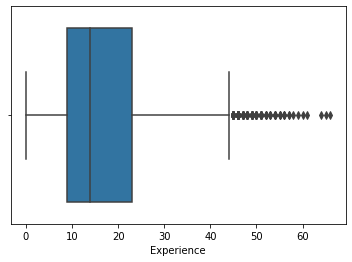

In [33]:
#plotting outliets for the numeric variables in the dataset for both training and testing
sns.boxplot(ds_doc_train["Experience"])

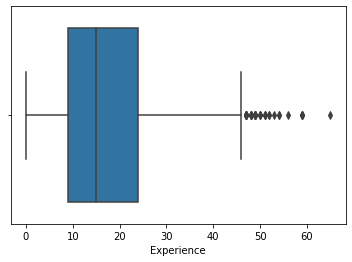

In [34]:
sns.boxplot(ds_doc_test["Experience"])

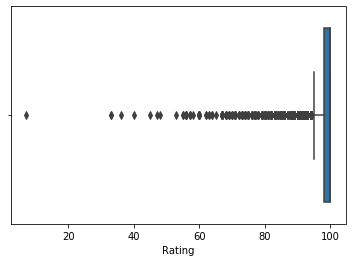

In [35]:
sns.boxplot(ds_doc_train["Rating"])

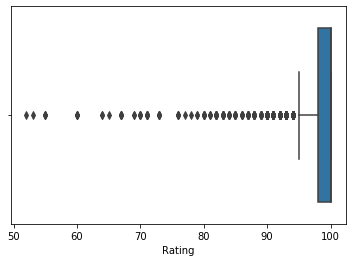

In [36]:
sns.boxplot(ds_doc_test["Rating"])

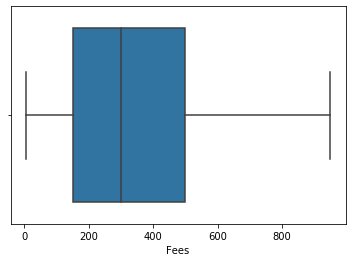

In [37]:
sns.boxplot(ds_doc_train["Fees"])

### Checking Distribution

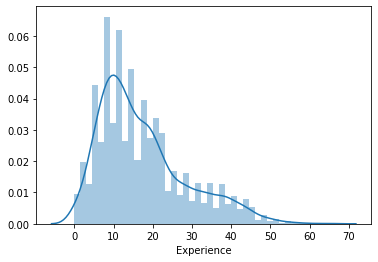

In [38]:
#checking distribution of the variables for both training and tesing data
sns.distplot(ds_doc_train["Experience"])

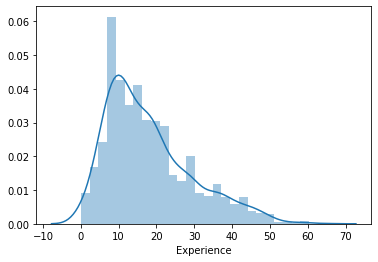

In [39]:
sns.distplot(ds_doc_test["Experience"])

### Checking Skewness

In [40]:
ds_doc_train.skew()

Experience    0.991089
Rating       -4.701646
Fees          0.751870
dtype: float64

In [41]:
ds_doc_test.skew()

Experience    0.963447
Rating       -3.824326
dtype: float64

### Quantifying  and Encoding 

In [42]:
#using get dummies to encode categorical values in training dataset
Profile_train=ds_doc_train["Profile"]
Profile_train=pd.get_dummies(Profile_train,drop_first=True)
Profile_train

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
5956,0,0,1,0,0
5957,0,0,0,1,0
5958,0,0,0,1,0
5959,0,0,0,1,0


In [43]:
#using get dummies to encode categorical values in testing dataset
Profile_test=ds_doc_test["Profile"]
Profile_test=pd.get_dummies(Profile_test,drop_first=True)
Profile_test

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1982,0,0,0,0,0
1983,0,1,0,0,0
1984,0,0,0,1,0
1985,1,0,0,0,0


In [44]:
#using get dummies to encode categorical values in training dataset
City_train=ds_doc_train["City"]
City_train=pd.get_dummies(City_train,drop_first=True)
City_train

,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram,XXX
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5956,0,0,0,0,0,0,0,0,0
5957,1,0,0,0,0,0,0,0,0
5958,0,0,1,0,0,0,0,0,0
5959,0,0,0,0,0,1,0,0,0


In [45]:
City_train.drop("XXX",inplace=True,axis=1)

In [46]:
#using get dummies to encode categorical values in testing dataset
City_test=ds_doc_test["City"]
City_test=pd.get_dummies(City_test,drop_first=True)
City_test

,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1982,0,0,0,0,0,0,0
1983,1,0,0,0,0,0,0
1984,1,0,0,0,0,0,0
1985,0,0,0,0,0,0,0


In [47]:
#using label encoding to quantify Qualification column in training dataset.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds_doc_train["Qual_1"]=le.fit_transform(ds_doc_train["Qual_1"].astype(str))
ds_doc_train

,Experience,Rating,Profile,Fees,Qual_1,City
0,24,100,Homeopath,100,8,Ernakulam
1,12,98,Ayurveda,350,5,Bangalore
2,9,100,ENT Specialist,300,79,Bangalore
3,12,100,Ayurveda,250,12,Bangalore
4,20,100,Ayurveda,250,5,Chennai
...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,79,Bangalore
5957,33,100,General Medicine,100,79,Chennai
5958,41,97,General Medicine,600,79,Delhi
5959,15,90,General Medicine,100,79,Mumbai


In [48]:
#using label encoding to quantify Qualification column in testing dataset.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds_doc_test["Qual_1"]=le.fit_transform(ds_doc_test["Qual_1"].astype(str))
ds_doc_test

,Experience,Rating,Profile,Qual_1,City
0,35,100,General Medicine,48,Mumbai
1,31,100,ENT Specialist,48,Hyderabad
2,40,70,Dermatologists,48,Chennai
3,0,100,Ayurveda,1,Delhi
4,16,100,Dentist,2,Bangalore
...,...,...,...,...,...
1982,10,100,Ayurveda,1,Bangalore
1983,4,100,Dermatologists,52,Chennai
1984,9,100,General Medicine,48,Chennai
1985,12,98,Dentist,2,Bangalore


### Framing Final Dataframe

In [49]:
#faming final training dataframe 
train=pd.concat([ds_doc_train,City_train,Profile_train],axis=1)
train

,Experience,Rating,Profile,Fees,Qual_1,City,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,24,100,Homeopath,100,8,Ernakulam,0,0,0,1,0,0,0,0,0,0,0,0,1
1,12,98,Ayurveda,350,5,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,100,ENT Specialist,300,79,Bangalore,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,100,Ayurveda,250,12,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,5,Chennai,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,79,Bangalore,0,0,0,0,0,0,0,0,0,0,1,0,0
5957,33,100,General Medicine,100,79,Chennai,1,0,0,0,0,0,0,0,0,0,0,1,0
5958,41,97,General Medicine,600,79,Delhi,0,0,1,0,0,0,0,0,0,0,0,1,0
5959,15,90,General Medicine,100,79,Mumbai,0,0,0,0,0,1,0,0,0,0,0,1,0


In [50]:
#faming final testing dataframe 
test=pd.concat([ds_doc_test,City_test,Profile_test],axis=1)
test

,Experience,Rating,Profile,Qual_1,City,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,35,100,General Medicine,48,Mumbai,0,0,0,0,0,1,0,0,0,0,1,0
1,31,100,ENT Specialist,48,Hyderabad,0,0,0,0,1,0,0,0,0,1,0,0
2,40,70,Dermatologists,48,Chennai,1,0,0,0,0,0,0,0,1,0,0,0
3,0,100,Ayurveda,1,Delhi,0,0,1,0,0,0,0,0,0,0,0,0
4,16,100,Dentist,2,Bangalore,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,100,Ayurveda,1,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0
1983,4,100,Dermatologists,52,Chennai,1,0,0,0,0,0,0,0,1,0,0,0
1984,9,100,General Medicine,48,Chennai,1,0,0,0,0,0,0,0,0,0,1,0
1985,12,98,Dentist,2,Bangalore,0,0,0,0,0,0,0,1,0,0,0,0


In [51]:
#dropping unwanted columns from the traning dataset
train.drop("Profile",inplace=True,axis=1)
train.drop("City",inplace=True,axis=1)

In [52]:
#dropping unwanted columns from the testing dataset
test.drop("Profile",inplace=True,axis=1)
test.drop("City",inplace=True,axis=1)

In [53]:
#calling final training dataset
train

,Experience,Rating,Fees,Qual_1,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,24,100,100,8,0,0,0,1,0,0,0,0,0,0,0,0,1
1,12,98,350,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,100,300,79,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,100,250,12,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100,250,5,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,300,79,0,0,0,0,0,0,0,0,0,0,1,0,0
5957,33,100,100,79,1,0,0,0,0,0,0,0,0,0,0,1,0
5958,41,97,600,79,0,0,1,0,0,0,0,0,0,0,0,1,0
5959,15,90,100,79,0,0,0,0,0,1,0,0,0,0,0,1,0


In [54]:
#calling final testing dataset
test

,Experience,Rating,Qual_1,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,35,100,48,0,0,0,0,0,1,0,0,0,0,1,0
1,31,100,48,0,0,0,0,1,0,0,0,0,1,0,0
2,40,70,48,1,0,0,0,0,0,0,0,1,0,0,0
3,0,100,1,0,0,1,0,0,0,0,0,0,0,0,0
4,16,100,2,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,100,1,0,0,0,0,0,0,0,0,0,0,0,0
1983,4,100,52,1,0,0,0,0,0,0,0,1,0,0,0
1984,9,100,48,1,0,0,0,0,0,0,0,0,0,1,0
1985,12,98,2,0,0,0,0,0,0,0,1,0,0,0,0


### Removing Outliers

In [55]:
#using Zscore to remove the outliers from the training dataset
from scipy.stats import zscore
z=np.abs(zscore(train))
threshold=3
print(np.where(z>3))
train_new=train[(z<3).all(axis=1)]
print(train.shape)
print(train_new.shape)

(array([   0,    9,   12,   18,   20,   23,   25,   28,   49,   55,   67,
         77,   85,  102,  104,  105,  110,  116,  118,  140,  144,  148,
        151,  159,  174,  176,  178,  183,  185,  203,  204,  209,  210,
        211,  218,  227,  261,  266,  275,  293,  298,  308,  309,  312,
        316,  317,  322,  325,  333,  344,  363,  372,  373,  376,  377,
        379,  391,  394,  409,  414,  458,  465,  471,  491,  498,  503,
        519,  535,  547,  552,  555,  562,  581,  582,  585,  590,  594,
        603,  610,  631,  632,  655,  656,  673,  679,  686,  692,  698,
        717,  726,  731,  749,  787,  788,  810,  815,  816,  830,  835,
        851,  868,  895,  901,  901,  902,  904,  911,  918,  922,  941,
        955,  968,  979,  980,  987,  990,  991,  995,  998, 1009, 1016,
       1018, 1021, 1025, 1044, 1049, 1052, 1062, 1063, 1072, 1075, 1086,
       1106, 1109, 1111, 1125, 1127, 1158, 1170, 1174, 1181, 1201, 1219,
       1233, 1240, 1242, 1246, 1258, 1272, 1276, 1

In [56]:
#using Zscore to remove the outliers from the testing dataset
from scipy.stats import zscore
z=np.abs(zscore(test))
threshold=3
print(np.where(z>3))
test_new=test[(z<3).all(axis=1)]
print(test.shape)
print(test_new.shape)

(array([   2,   11,   17,   21,   54,   58,   65,   72,   95,  101,  104,
        118,  131,  139,  154,  157,  165,  168,  195,  214,  219,  222,
        227,  258,  261,  264,  264,  265,  283,  303,  336,  355,  357,
        362,  370,  386,  398,  406,  412,  436,  445,  446,  448,  449,
        454,  481,  483,  488,  509,  513,  530,  564,  565,  593,  602,
        604,  617,  622,  641,  651,  652,  664,  671,  676,  677,  699,
        709,  723,  724,  729,  760,  769,  772,  773,  775,  776,  777,
        781,  783,  793,  795,  800,  801,  819,  865,  867,  874,  878,
        889,  895,  897,  929,  937,  939,  964,  969,  971,  976,  989,
        990,  992,  992,  996, 1001, 1034, 1044, 1049, 1061, 1081, 1089,
       1094, 1099, 1104, 1121, 1159, 1162, 1164, 1170, 1201, 1224, 1233,
       1244, 1246, 1260, 1270, 1284, 1288, 1294, 1297, 1298, 1300, 1333,
       1334, 1337, 1347, 1351, 1374, 1384, 1387, 1394, 1404, 1405, 1405,
       1410, 1425, 1432, 1436, 1439, 1448, 1451, 1

### Splitting Input and Target Variable

In [57]:
#splitting the data into target and input variable for the regression study  
train_x=train_new.drop(columns="Fees")
y=pd.DataFrame(train_new["Fees"])

In [58]:
#calling input variable
train_x

,Experience,Rating,Qual_1,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
1,12,98,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,100,79,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,100,12,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100,5,1,0,0,0,0,0,0,0,0,0,0,0,0
5,8,100,5,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,79,0,0,0,0,0,0,0,0,0,0,1,0,0
5957,33,100,79,1,0,0,0,0,0,0,0,0,0,0,1,0
5958,41,97,79,0,0,1,0,0,0,0,0,0,0,0,1,0
5959,15,90,79,0,0,0,0,0,1,0,0,0,0,0,1,0


In [59]:
#calling target variable
y

,Fees
1,350
2,300
3,250
4,250
5,100
...,...
5956,300
5957,100
5958,600
5959,100


### Removing Skewness

In [60]:
#removing skewness from input variable of the training set
for i in train_x.columns:
    if train_x[i].skew()>.55:
        train_x[i]=np.log1p(train_x[i])

In [61]:
#removing skewness from input variable of the testing set
for i in test.columns:
    if test[i].skew()>.55:
        test[i]=np.log1p(test[i])

In [62]:
#calling training dataset
train_x

,Experience,Rating,Qual_1,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
1,2.564949,98,5,0.000000,0,0.000000,0,0.0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.0
2,2.302585,100,79,0.000000,0,0.000000,0,0.0,0.000000,0,0,0.000000,0.0,0.693359,0.000000,0.0
3,2.564949,100,12,0.000000,0,0.000000,0,0.0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.0
4,3.044522,100,5,0.693359,0,0.000000,0,0.0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.0
5,2.197225,100,5,0.693359,0,0.000000,0,0.0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,2.995732,98,79,0.000000,0,0.000000,0,0.0,0.000000,0,0,0.000000,0.0,0.693359,0.000000,0.0
5957,3.526361,100,79,0.693359,0,0.000000,0,0.0,0.000000,0,0,0.000000,0.0,0.000000,0.693359,0.0
5958,3.737670,97,79,0.000000,0,0.693359,0,0.0,0.000000,0,0,0.000000,0.0,0.000000,0.693359,0.0
5959,2.772589,90,79,0.000000,0,0.000000,0,0.0,0.693359,0,0,0.000000,0.0,0.000000,0.693359,0.0


In [63]:
#calling testing dataset
test

,Experience,Rating,Qual_1,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,3.583519,100,48,0.000000,0.0,0.000000,0.0,0.000000,0.693359,0.0,0.000000,0.000000,0.000000,0.693359,0.0
1,3.465736,100,48,0.000000,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.000000,0.000000,0.693359,0.000000,0.0
2,3.713572,70,48,0.693359,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.693359,0.000000,0.000000,0.0
3,0.000000,100,1,0.000000,0.0,0.693359,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,2.833213,100,2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.693359,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,2.397895,100,1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1983,1.609438,100,52,0.693359,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.693359,0.000000,0.000000,0.0
1984,2.302585,100,48,0.693359,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.693359,0.0
1985,2.564949,98,2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.693359,0.000000,0.000000,0.000000,0.0


### Scaling Input Variable

In [64]:
#using standard scaler to scale input variables of the training dataset
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(train_x)
x=pd.DataFrame(x,columns=train_x.columns)

In [65]:
#renaming columns
x.columns=["Experience","Rating","Qual_1","Chennai","Coimbatore","Delhi","Ernakulam","Hyderabad","Mumbai","Extra","Thiruvananthapuram","Dentist","Dermatologists","ENT Specialist","General Medicine","Homeopath"]

In [66]:
x.drop("Extra",inplace=True,axis=1)
x

,Experience,Rating,Qual_1,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0.652356,0.90,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.585627,1.00,0.526667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.652356,1.00,0.080000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.774328,1.00,0.033333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.558831,1.00,0.033333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,0.761919,0.90,0.526667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5303,0.896876,1.00,0.526667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5304,0.950619,0.85,0.526667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5305,0.705166,0.50,0.526667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
#using standard scaler to scale input variables of the testing dataset
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
test=mms.fit_transform(test)
test

array([[0.8553256 , 1.        , 0.55813953, ..., 0.        , 1.        ,
        0.        ],
       [0.82721277, 1.        , 0.55813953, ..., 1.        , 0.        ,
        0.        ],
       [0.88636709, 0.375     , 0.55813953, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.54958827, 1.        , 0.55813953, ..., 0.        , 1.        ,
        0.        ],
       [0.6122102 , 0.95833333, 0.02325581, ..., 0.        , 0.        ,
        0.        ],
       [0.52444049, 1.        , 0.55813953, ..., 0.        , 0.        ,
        0.        ]])

### Seperating Training and Testing Data

In [68]:
#using train_test_split to seperate training and testing data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4245, 15)
(1062, 15)
(4245, 1)
(1062, 1)


### Importing Regression Algorithim and Metrices

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Assigning Aliases

In [70]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
SVR=SVR()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor()
ABR=AdaBoostRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()

### Appending Models

In [71]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('SVR',SVR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

### Machine Learning

In [72]:
#using a for loop to find the best perfoming model
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    r2=r2_score(y_test,pred)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pred)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.12640956022425276
Mean_Squared_Error = 32943.896742243625
Mean_Absolute_Error = 147.57458720298
Root_Mean_Squared_Error = 181.50453642331814
Cross_Val_Score =  0.10942973648304166


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.11935834668480028
Mean_Squared_Error = 33209.80447219871
Mean_Absolute_Error = 148.97900539239293
Root_Mean_Squared_Error = 182.2355741127366
Cross_Val_Score =  0.10601970431394636


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ran

### Framing Compare Table

In [73]:
#structuring the compare DataFrame
result = pd.DataFrame({"Model":Model,"R2_score":R2_score,"Mean_Squared_Error":MSE,"Cross_Val_score":cvs,
                       "Root_Mean_Squared_Error":RMSE,"Mean_Absolute_Error":MAE})
result

,Model,R2_score,Mean_Squared_Error,Cross_Val_score,Root_Mean_Squared_Error,Mean_Absolute_Error
0,LinearRegression,0.126410,32943.896742,0.109,181.504536,147.574587
1,Lasso,0.119358,33209.804472,0.106,182.235574,148.979005
2,Ridge,0.126293,32948.304317,0.109,181.516678,147.600467
3,ElasticNet,0.045008,36013.631802,0.043,189.772579,157.685015
4,SVR,0.057271,35551.178140,0.059,188.550201,148.965299
5,DecisionTreeRegressor,-0.398246,52729.152293,-0.426,229.628292,167.493293
6,KNeighborsRegressor,0.028147,36649.478493,0.016,191.440535,147.946893
7,AdaBoostRegressor,0.121553,33127.052679,0.093,182.008386,152.774142
8,RandomForestRegressor,-0.010715,38114.979972,-0.037,195.230582,152.213681
9,GradientBoostingRegressor,0.170677,31274.518849,0.140,176.846031,141.982205


### Saving Model

In [77]:
import joblib
joblib.dump(LR,"Model_Doctors_Fee_LR.obj")

['Model_Doctors_Fee_LR.obj']

### Loading Model

In [78]:
Model_Doctors_Fee=joblib.load("Model_Doctors_Fee_LR.obj")

### Using Model

In [76]:
Model_Doctors_Fee.predict(test)

array([[312.5706928 ],
       [365.46492069],
       [398.89878624],
       ...,
       [275.88544588],
       [256.91371811],
       [338.88091357]])